In [1]:
WORKSPACE_PATH = 'workspace'
ANNOTATION_PATH = WORKSPACE_PATH+'/annotations'
IMAGE_PATH = WORKSPACE_PATH+'/images/original'
MODEL_PATH = WORKSPACE_PATH+'/models'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import xml.etree.ElementTree as ET

image_height = 0
image_width = 0
channels = 3
boxes = []
labels = []
iamge_names = []

def extract_annotations(xml_path):

    tree = ET.parse(xml_path)
    root = tree.getroot()

    meta_tag = root.find('meta')
    image_tag = root.find('image')
    task_tag = meta_tag.find('task')
    image_count = int(task_tag.find('size').text)
    image_height = int(image_tag.get('height'))
    image_width = int(image_tag.get('width'))


        
    for image in root.iter('image'):
        id =image.get('id')
        iamge_names.append((image.get('name'),id ))
        
        for box in image.iter('box'):
            box_coordinates = []
            box_coordinates.append(int(np.round(float(box.get('xtl')))))
            box_coordinates.append(int(np.round(float(box.get('ytl')))))
            box_coordinates.append(int(np.round(float(box.get('xbr')))))
            box_coordinates.append(int(np.round(float(box.get('ybr')))))
            box_coordinates.append(int(id))
            boxes.append(box_coordinates)
            labels.append(box.get('label'))
            
    print(iamge_names)
    print(boxes)
    print(labels)
    
    images = (image_count, image_height, image_width, channels)
    dataset = (images, boxes, labels)
    
extract_annotations(ANNOTATION_PATH + '/annotations.xml')


[('BafoegAntragSeite1Bild1.jpg', '0'), ('BafoegAntragSeite1Bild2.jpg', '1'), ('BafoegAntragSeite1Bild3.jpg', '2')]
[[193, 680, 729, 963, 0], [188, 1254, 737, 1387, 0], [193, 964, 729, 1251, 0], [193, 598, 746, 886, 1], [192, 1170, 744, 1298, 1], [194, 888, 745, 1166, 1], [140, 613, 695, 901, 2], [140, 1195, 698, 1325, 2], [140, 905, 698, 1189, 2]]
['Ausbildung', 'Anschrift', 'AngabenZuMeinerPerson', 'Ausbildung', 'Anschrift', 'AngabenZuMeinerPerson', 'awfqwafawg', 'Anschrift', 'AngabenZuMeinerPerson']


[[193, 680, 729, 963, 0]]


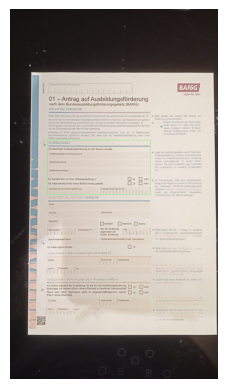

[[188, 1254, 737, 1387, 0]]


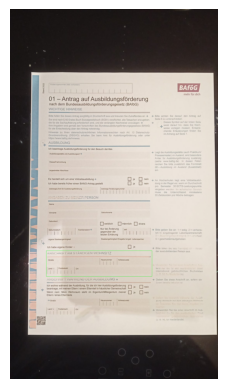

[[193, 964, 729, 1251, 0]]


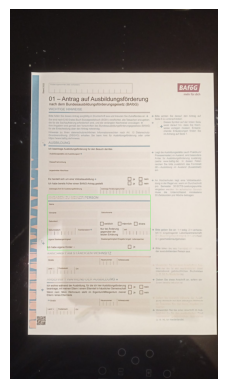

[[193, 598, 746, 886, 1]]


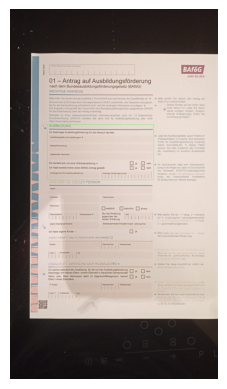

[[192, 1170, 744, 1298, 1]]


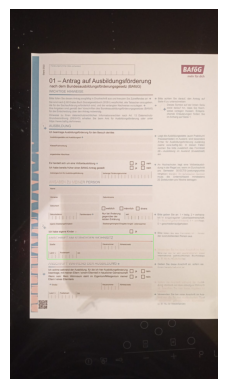

[[194, 888, 745, 1166, 1]]


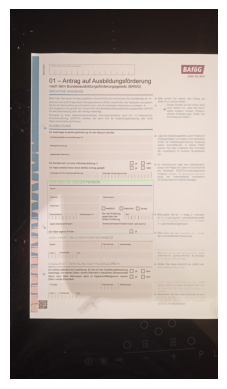

[[140, 613, 695, 901, 2]]


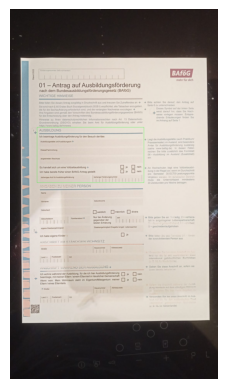

[[140, 1195, 698, 1325, 2]]


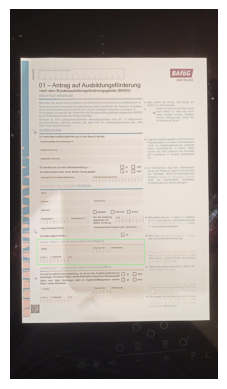

[[140, 905, 698, 1189, 2]]


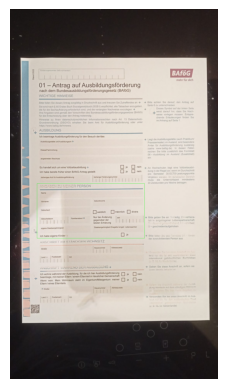

In [5]:
import cv2
def draw_bounding_boxes(image, boxes):
    print(boxes)
    for box in boxes: 
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 1)

for i in range(len(boxes)):
    image_id = boxes[i][4]
    img=cv2.imread(IMAGE_PATH + '/' + iamge_names[image_id][0])
    buffbox = [boxes[i]]
    draw_bounding_boxes(img, buffbox)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [123]:
def resize_image_boxes(image_path, boxes, height, width):
    image =  cv2.imread(image_path)
    resized_image = cv2.resize(image, (height, width))

    #
    height_ratio = height / image.shape[0]
    print(height_ratio)
    width_ratio = width / image.shape[1]
    print(width_ratio)
    resized_boxes = []
    print(boxes[0])
    for box in boxes:
        resized_xtl = int(np.round(box[0] * width_ratio))
        resized_ytl = int(np.round(box[1] * height_ratio))
        resized_xbr = int(np.round(box[2] * width_ratio))
        resized_ybr = int(np.round(box[3] * height_ratio))
        resized_boxes.append([resized_xtl, resized_ytl, resized_xbr, resized_ybr])
    print(resized_boxes[0])    
    return resized_image, resized_boxes

resize_image_boxes(IMAGE_PATH + '/' + iamge_names[0][0], boxes, 512, 512)

0.26666666666666666
0.4740740740740741
[193, 680, 729, 963, 0]
[91, 181, 346, 257]


(array([[[17, 18, 22],
         [17, 18, 22],
         [16, 17, 21],
         ...,
         [22, 22, 28],
         [23, 23, 29],
         [24, 24, 30]],
 
        [[17, 18, 22],
         [17, 18, 22],
         [16, 17, 21],
         ...,
         [23, 23, 29],
         [22, 22, 28],
         [22, 22, 28]],
 
        [[18, 19, 23],
         [17, 18, 22],
         [16, 17, 21],
         ...,
         [23, 23, 29],
         [23, 23, 29],
         [23, 23, 29]],
 
        ...,
 
        [[20, 16, 22],
         [21, 17, 22],
         [20, 16, 21],
         ...,
         [18, 19, 23],
         [18, 19, 23],
         [18, 19, 23]],
 
        [[21, 17, 23],
         [21, 17, 22],
         [21, 17, 22],
         ...,
         [19, 20, 24],
         [19, 20, 24],
         [19, 20, 24]],
 
        [[21, 17, 23],
         [21, 17, 22],
         [21, 17, 22],
         ...,
         [19, 20, 24],
         [19, 20, 24],
         [19, 20, 24]]], dtype=uint8),
 [[91, 181, 346, 257],
  [89, 334, 349, 37

In [124]:
res_image, res_boxes =resize_image_boxes(IMAGE_PATH + '/' + iamge_names[0][0], boxes, 512, 512)

0.26666666666666666
0.4740740740740741
[193, 680, 729, 963, 0]
[91, 181, 346, 257]


[[91, 181, 346, 257]]


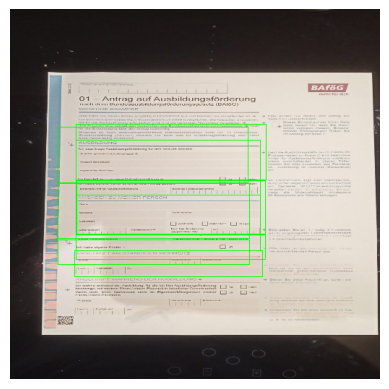

[[89, 334, 349, 370]]


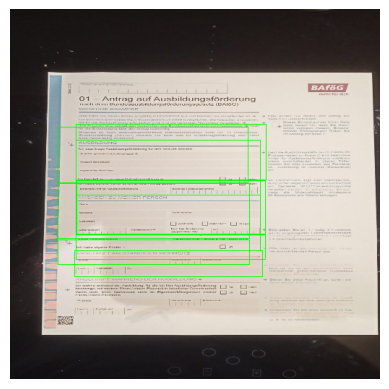

[[91, 257, 346, 334]]


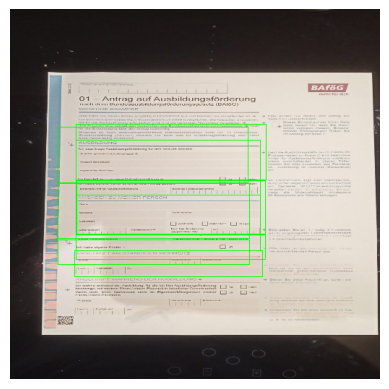

[[91, 159, 354, 236]]


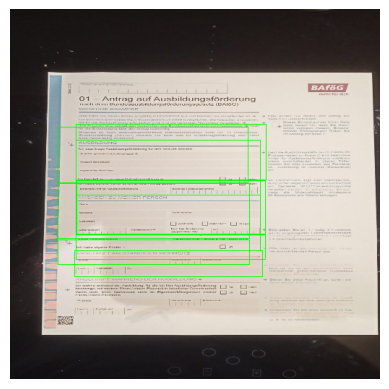

[[91, 312, 353, 346]]


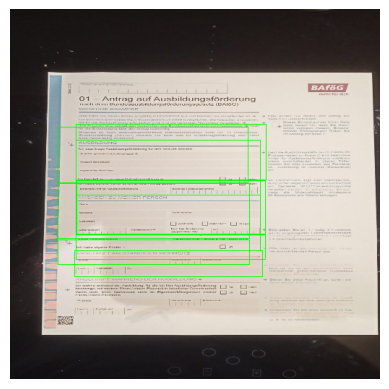

[[92, 237, 353, 311]]


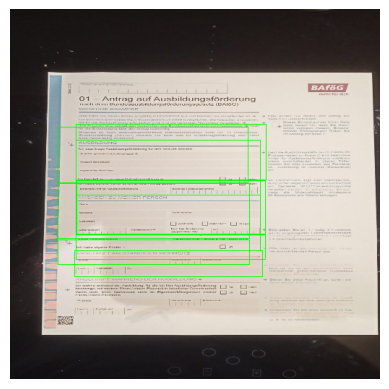

[[66, 163, 329, 240]]


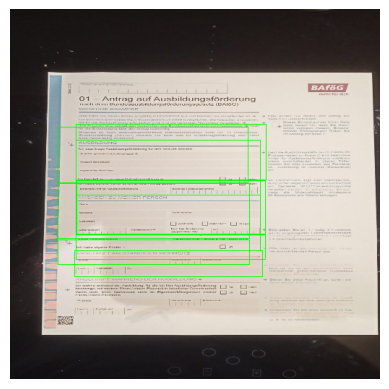

[[66, 319, 331, 353]]


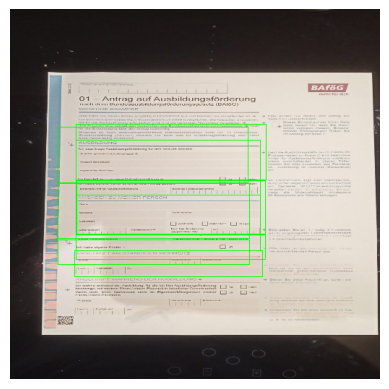

[[66, 241, 331, 317]]


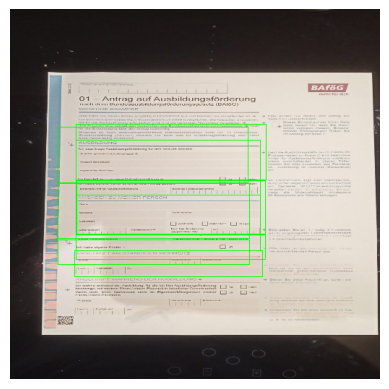

In [129]:
for i in range(len(boxes)):
    image_id = boxes[i][4]
    #img=cv2.imread(IMAGE_PATH + '/' + iamge_names[image_id][0])
    buffbox = [res_boxes[i]]
    draw_bounding_boxes(res_image, buffbox)

    plt.imshow(cv2.cvtColor(res_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [29]:
labels = [{'name':'Ausbildung', 'id':1}, {'name':'Anschrift', 'id':2} , {'name':'AngabenZuMeinerPerson', 'id':3}]

with open(ANNOTATION_PATH + '\label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

#5 Creating TFRecrods

In [ ]:
num_samples = 4096
num_tfrecords = len(annotations) // num_samples
if len(annotations) % num_samples:
    num_tfrecords += 1  # add one record if there are any remaining samples

if not os.path.exists(tfrecords_dir):
    os.makedirs(tfrecords_dir)  # creating TFRecords output folder


In [ ]:
def image_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(value).numpy()])
    )


def bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.encode()]))


def float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def float_feature_list(value):
    """Returns a list of float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))


def create_example(image, path, example):
    feature = {
        "image": image_feature(image),
        "path": bytes_feature(path),
        "area": float_feature(example["area"]),
        "bbox": float_feature_list(example["bbox"]),
        "category_id": int64_feature(example["category_id"]),
        "id": int64_feature(example["id"]),
        "image_id": int64_feature(example["image_id"]),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))


def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "path": tf.io.FixedLenFeature([], tf.string),
        "area": tf.io.FixedLenFeature([], tf.float32),
        "bbox": tf.io.VarLenFeature(tf.float32),
        "category_id": tf.io.FixedLenFeature([], tf.int64),
        "id": tf.io.FixedLenFeature([], tf.int64),
        "image_id": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
    example["bbox"] = tf.sparse.to_dense(example["bbox"])
    return example


In [ ]:
for tfrec_num in range(num_tfrecords):
    samples = annotations[(tfrec_num * num_samples) : ((tfrec_num + 1) * num_samples)]

    with tf.io.TFRecordWriter(
        tfrecords_dir + "/file_%.2i-%i.tfrec" % (tfrec_num, len(samples))
    ) as writer:
        for sample in samples:
            image_path = f"{images_dir}/{sample['image_id']:012d}.jpg"
            image = tf.io.decode_jpeg(tf.io.read_file(image_path))
            example = create_example(image, image_path, sample)
            writer.write(example.SerializeToString())
